Analysis of Student Performance Data

Background Information :

We have chosen to analyze data collected on students from two secondary schools in Portugal. Information was recorded by survey and school reports on both the educational careers and the personal lives of the students. In total, 32 variables were recorded for the dataset. This includes details on work habits and grades as well as family background and details on leisure time outside school. 

Question being answered in this project :

Our goal is to determine if a student’s final grade can be accurately predicted based on given variables. Namely, we will attempt to answer the question: How well will a student perform and what factors affect the student performance?

In [1]:
# Libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In the code below, we have read the data from the web and assigned it to a data frame object called student_data

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
download.file(url, "student.zip")
unzip("student.zip")
student_data <- read_delim("student-por.csv", delim=";")
student_data

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,13,12,13
GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,2,10,13,13
GP,M,15,U,LE3,A,3,2,services,other,⋯,4,2,2,1,1,1,0,15,16,17


In the code below, we have estimated which variables would have the highest correlation with G3(final grade)

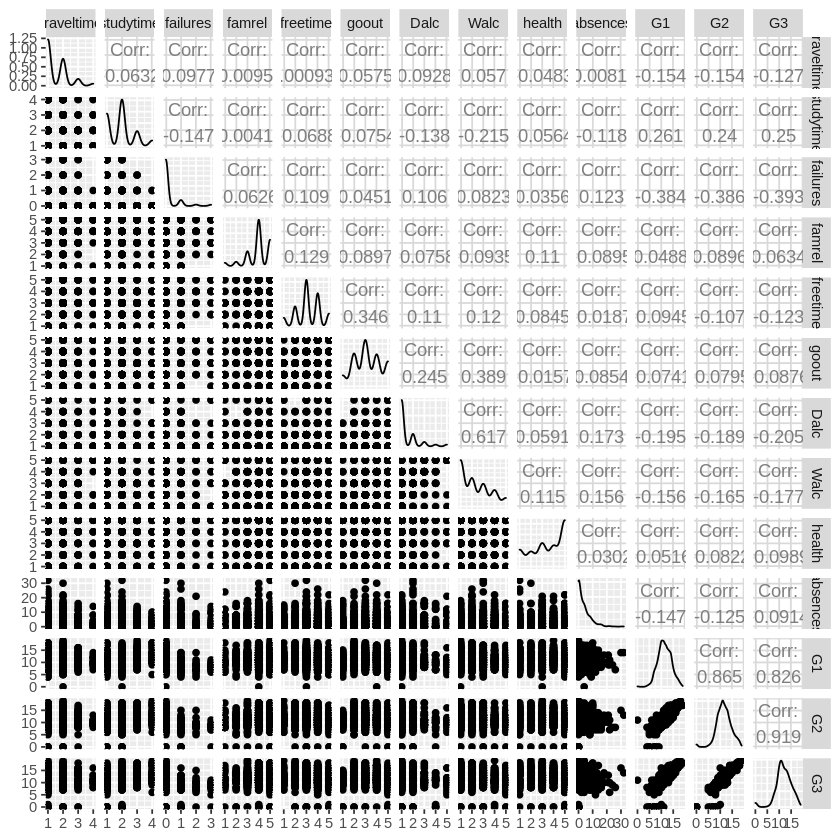

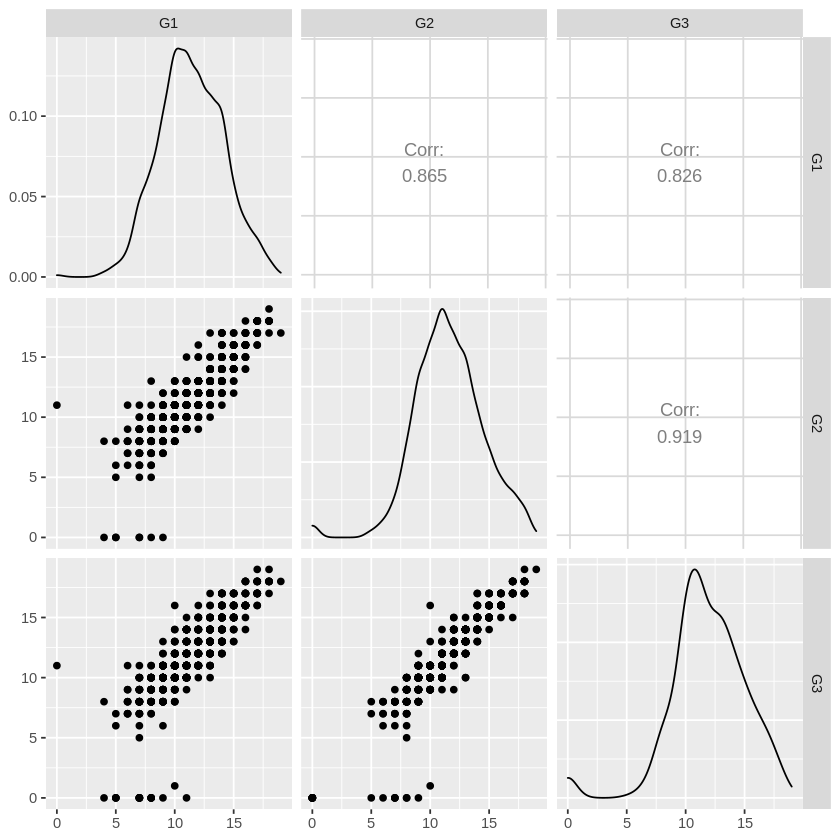

In [3]:
guessed_visualization <- ggpairs(select(student_data, traveltime, studytime, failures, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3))
guessed_visualization

student_select <- select(student_data, G1, G2, G3)
predictor_visualization <- ggpairs(student_select)
predictor_visualization

From the graphs above, we can see that G1(first period grade) and G2(second period grade) had the highest correlation with G3. 
Therefore, we will use them to train our model for k-nearest neighbor regression.

In [4]:
student_split <- initial_split(student_data, prop = 0.75, strata = G3)
student_training <- training(student_split) 
student_testing <- testing(student_split)
student_training

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,13,12,13
GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,2,10,13,13
GP,M,15,U,GT3,T,3,4,other,other,⋯,5,5,1,1,1,5,0,12,12,13
GP,F,15,U,GT3,T,4,4,teacher,health,⋯,3,3,3,1,2,2,2,14,14,14
GP,M,15,U,LE3,T,4,4,health,services,⋯,4,3,3,1,3,5,0,12,13,12
GP,M,15,U,GT3,T,4,3,teacher,other,⋯,5,4,3,1,2,3,0,12,12,13
GP,M,15,U,GT3,A,2,2,other,other,⋯,4,5,2,1,1,3,0,14,14,15
GP,F,16,U,GT3,T,4,4,health,other,⋯,4,4,4,1,2,2,6,17,17,17


In the training data set, we observe :
- There are 488 observations
- There are no missing observations and the data set is in a tidy format

The histogram below shows distribution of final grades for the training data set. The histogram will be helpful as a concise visualization of the training data set.

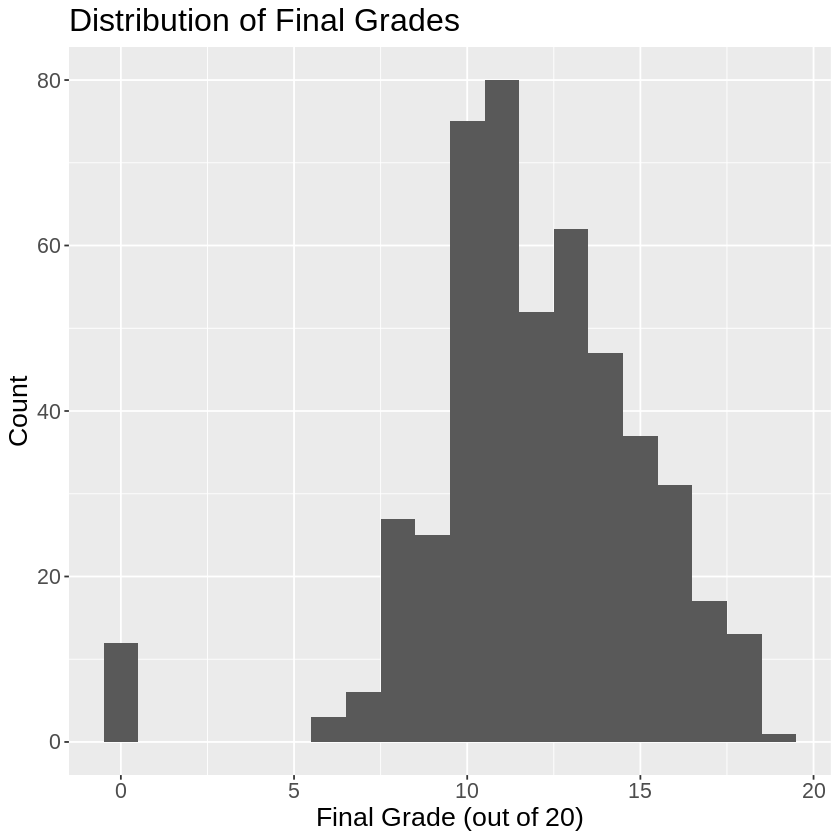

In [5]:
final_grade <- ggplot(student_training, aes(x = G3))+
geom_histogram(bins = 20)+
labs(x = "Final Grade (out of 20)", y = "Count")+
theme(text = element_text(size = 16))+
ggtitle("Distribution of Final Grades")
final_grade

We will visualize our results through k-nearest neighbors regression model and create a plot that visualizes the relationship between G3 with G1 and G2 along with the regression line. We have not used linear regression 
since more than one variable is involved for the prediction.

Conclusion:

We expect to find that there is a strong positive relationship between final grades with G1 and G2. We also expect the predicted final grades to be very close the actual final grades. 

These findings could be used to help students who might be struggling, especially those who are predicted to have lower/failing final grades. It will also help the school to predict a student's final grades based on their previous performance.

All this could lead to further analysis on the prediction of final grades, perhaps using variables other than first and second period grades and could be used to predict grades throughout the year rather than just the final. It could also lead to questions on how a student’s number of failures or amount of free time could be predicted, as this might also help indicate if a student needs additional help for their schooling.